In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gt4py
from gt4py import gtscript
import gt4py.storage as gt_storage

In [2]:
backend = "gtc:cuda"
backend = "gtc:dace"
backend = "gtc:numpy"
dtype = np.float64

In [3]:
@gtscript.function
def lap(in_field):
    out_field = (
        -4.0 * in_field
        + in_field[1, 0, 0]
        + in_field[-1, 0, 0]
        + in_field[0, 1, 0]
        + in_field[0, -1, 0]
    )
    return out_field


@gt4py.gtscript.stencil(backend=backend, rebuild=True)
def laplap(in_field: gtscript.Field[dtype], out_field: gtscript.Field[dtype]):
    with computation(PARALLEL), interval(...):
        tmp = lap(in_field)
        out_field = lap(tmp)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


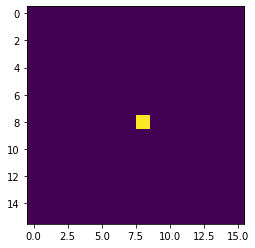

In [ ]:
Nx = 16
Ny = 16
Nz = 16

shape = (Nx, Ny, Nz)
origin = (2, 2, 0)

inp = np.zeros(shape)
inp[Nx//2, Ny//2, :] = 1.

# inp = np.fromfunction(lambda x, y, _: x**5 + y**5, shape, dtype=dtype),
# inp = np.random.rand(*shape),

in_storage = gt_storage.from_array(
    inp,
    default_origin=origin,
    backend=backend,
)
out_storage = gt_storage.from_array(
    np.zeros(shape, dtype=dtype), default_origin=origin, backend=backend
)

laplap(in_storage, out_storage)

print(np.asarray(out_storage)[:,1,1])

plt.imshow(np.asarray(in_storage)[:, :, 0])
# plt.imshow(np.asarray(out_storage)[:, :, 0])
# plt.plot(range(Nx),np.asarray(in_storage)[:,1,0])

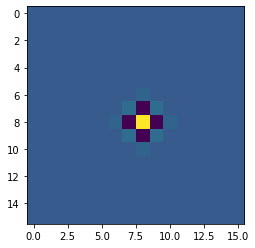

In [13]:
plt.imshow(np.asarray(out_storage)[:, :, 0])


In [18]:
print(np.asarray(out_storage)[Nx//2,Ny//2,0])
print(sum(sum(sum(np.asarray(out_storage)))))
print(sum(sum(sum(np.asarray(in_storage)))))    

20.0
0.0
16.0
